# Forest fire propagation model

Time? 100


Time: 0
. 🌳 🌳 🌳 . . . . . . . 🌳 . 🌳 . 🌳 . . 🌳 🌳 🌳 🌳 . . . 🌳 . . . .
. 🌳 🌳 . . 🌳 🌳 . . 🌳 . 🌳 . 🌳 🌳 . 🌳 . 🌳 . . 🌳 . 🌳 🌳 🌳 🌳 . 🌳 🌳
🌳 🌳 🌳 . 🌳 . 🌳 . 🌳 🌳 . . 🌳 . 🌳 🌳 . . . 🌳 . 🌳 . . 🌳 . . . 🌳 .
. . 🌳 . . . 🌳 . . . 🌳 🌳 . . 🌳 . 🌳 . 🌳 . . 🌳 . 🌳 . . . 🌳 . 🌳
🌳 🌳 . . 🌳 🌳 . 🌳 🌳 🌳 . . . . 🌳 🌳 . . . 🌳 . . . 🌳 🌳 . 🌳 . 🌳 .
🌳 🌳 🌳 . 🌳 . . 🌳 . 🌳 🌳 🌳 🌳 . . 🌳 🌳 . . . 🌳 . 🌳 🌳 . . . . . .
. 🌳 🌳 . . 🌳 🌳 . . . 🌳 . . 🌳 . . 🌳 . . . 🌳 🌳 . 🌳 . . . 🌳 🌳 .
🌳 🌳 🌳 . 🌳 🌳 . 🌳 . . . 🌳 🌳 🌳 . . 🌳 🌳 . 🌳 . 🌳 . . 🌳 . 🌳 . 🌳 .
🌳 . . 🌳 . . . . 🌳 . 🌳 🌳 . . 🌳 🌳 . 🌳 . . . 🌳 . 🌳 🌳 🌳 . 🌳 🌳 🌳
. . 🌳 . . . . 🌳 . . . . . 🌳 . . 🌳 . . 🌳 🌳 🌳 🌳 🌳 🌳 . 🌳 . . .
. . 🌳 . . . . . . 🌳 🌳 🌳 . 🌳 . 🌳 . 🌳 🌳 . . 🌳 . 🌳 . 🌳 🌳 . 🌳 🌳
. 🌳 . 🌳 🌳 . . . 🌳 . 🌳 . . . . 🌳 🌳 . 🌳 . . 🌳 . . 🌳 🌳 . . 🌳 🌳
. . 🌳 🌳 🌳 🌳 . 🌳 . 🌳 🌳 🌳 🌳 . . . 🌳 🌳 . 🌳 🌳 🌳 . 🌳 . . 🌳 🌳 . .
. . . . . 🌳 . 🌳 🌳 🌳 🌳 . 🌳 🌳 🌳 . 🌳 . 🌳 . . . . . . . . . . 🌳
. 🌳 . 🌳 . . . . 🌳 . 🌳 . . . . . 🌳 🌳 🌳 . . 🌳 . . . . 🌳 🌳 🌳 🌳
. . . 🌳 . . . 🌳 🌳 . . 🌳 🌳 . . . 🌳 🌳 . . 🌳 🌳 . 🌳 🌳 . . 🌳 🌳 🌳
🌳 . . 🌳 . . . 🌳 . . 🌳 🌳 . . . 🌳 

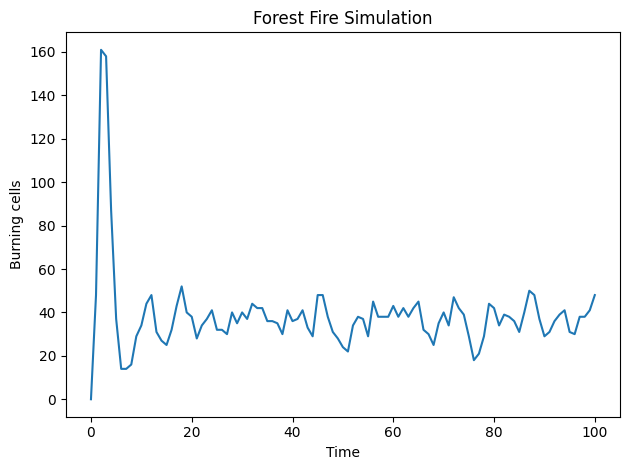

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

def print_grid():
  for row in Grid:
    print(" ".join(row))

def setup():
  rng = np.random.default_rng(0)               # deterministic start
  A = np.where(rng.random((size, size)) < grow_start, TREE, EMPTY)
  return A.astype(object)

def burn(G, i, j):
  s, e = G.shape
  i0, i1 = max(0, i-1), min(s, i+2)
  j0, j1 = max(0, j-1), min(e, j+2)
  return np.any(G[i0:i1, j0:j1] == FIRE)

def count(G):
  return int(np.sum(G == FIRE))

def update(G):
  rng = np.random.default_rng()               # new randomness each step
  R_grow  = rng.random(G.shape)
  R_light = rng.random(G.shape)

  B = G.copy()

  # EMPTY -> TREE with prob p
  B[(G == EMPTY) & (R_grow < p)] = TREE

  # TREE -> FIRE if any neighbor burning
  for i in range(G.shape[0]):
    for j in range(G.shape[1]):
      if G[i, j] == TREE and burn(G, i, j):
        B[i, j] = FIRE

  # TREE -> FIRE by lightning with prob 'lightning'
  B[(G == TREE) & (R_light < lightning)] = FIRE

  # FIRE -> EMPTY
  B[G == FIRE] = EMPTY
  return B

# States
EMPTY = "."
TREE  = "🌳"
FIRE  = "🔥"

# Simulation parameters
size = 30
grow_start = 0.5
p = 0.05
lightning = 0.1      # grader may change this; 0 means no fires should ever appear

# Initial matrix
Grid = setup()

# Ask for simulation length
tEnd = int(input("Time?"))

# Print t = 0
print("Time: 0")
print_grid()

fires_over_time = [count(Grid)]
ever_fire = (fires_over_time[-1] > 0)

# Run
for t in range(1, tEnd + 1):
  Grid = update(Grid)
  print(f"Time: {t}")
  print_grid()
  c = count(Grid)
  fires_over_time.append(c)
  if c > 0:
    ever_fire = True

# Plot (required by tests)
os.makedirs("cx_out", exist_ok=True)
plt.figure()
plt.plot(fires_over_time)
plt.xlabel("Time")
plt.ylabel("Burning cells")
plt.title("Forest Fire Simulation")
plt.tight_layout()
plt.savefig("cx_out/forest.png")

# MUST be last line for the no-fire case
if not ever_fire:
  print("No fires found.")
